# Машинное обучение, ФКН ВШЭ

# Семинар 7

На лекции было рассказано, что метод построения решающего дерева определяется следующими пунктами:
- Видом предикатов в вершинах;
- Критерием информативности;
- Критерием останова;
- Методом обработки пропущенных значений;
- Методом стрижки.

Именно про различные критерии информативности мы и будем говорить дальше.

## Критерии информативности в решающих деревьях

При построении дерева необходимо задать *функционал* $Q(X, j, s)$,
на основе которого осуществляется разбиение выборки на каждом шаге.

Рассмотрим различные способы задания таких функционалов в задачах классификации. Пусть $R_m$~--- множество объектов обучающей выборки, попавших в вершину $m$.

- $N_m = |R_m|$ - число таких объектов.
- $p_{mk}$ - доля объектов класса $k$ ($k \in \{1, \dots, K\}$), попавших в вершину $m$:

$$p_{mk}=\frac{1}{N_m} \sum_{(x_i, y_i) \in R_m}[y_i = k],$$

- Через $k_m$ обозначим класс, чьих представителей оказалось больше всего среди объектов, попавших в вершину $m$:

$$k_m = arg \max_k p_{mk}$$.

- Посмотрим как выглядит критерий информативности, который является долей объектов из $R_m$, которые были бы неправильно классифицированы, если бы вершина $m$ была листовой и относила все объекты к классу $k_m$:
$$
    F_E(R_m)
    =
    \frac{1}{N_m}
    \sum_{(x_i, y_i) \in R_m}
        [y_i \neq k_m].
$$


Функционал ошибки при ветвлении вершины $m$ определяется как
$$
    Q_E(R_m, j, s) = F_E(R_m) - \frac{N_\ell}{N_m} F_E(R_\ell) - \frac{N_r}{N_m} F_E(R_r),
$$
где $\ell$ и $r$ - индексы левой и правой дочерних вершин.
Данный функционал необходимо максимизировать.

#### Задача 1
Покажите, что критерий информативности также можно записать в виде 
    $$F_E(R_m) = 1 - p_{m, k_m}$$
    
#### Решение    
$$ 
1 = \frac{1}{N_m}\sum_{x_i \in R_m}[y_i \neq k_m] + \frac{1}{N_m}\sum_{x_i \in R_m}[y_i = k_m] 
$$
$$
F_E(R_m) = \frac{1}{N_m}\sum_{x_i \in R_m}[y_i \neq k_m] = 1 - p_{m, k_m}
$$

Данный критерий является достаточно грубым,
поскольку учитывает частоту $p_{m, k_m}$ лишь одного класса.

# Индекс Джини

Критерий информативности имеет вид
$$
    F_G(R_m)
    =
    \sum_{k \neq k'}
        p_{mk} p_{mk'}.
$$

Функционал определяется так же, как и в предыдущем случае:
$$
    Q_G(R_m, j, s) = F_G(R_m) - \frac{N_\ell}{N_m} F_G(R_\ell) - \frac{N_r}{N_m} F_G(R_r).
$$

#### Задача 2

Покажите, что индекс Джини $F_G(R_m)$ также можно записать в виде: 

$$F_G(R_m) = \sum_{k = 1}^{K} p_{mk} (1 - p_{mk}) = 1 - \sum_{k = 1}^K p_{mk}^2.$$

#### Решение

$$
        \sum_{k \neq k'} p_{mk} p_{mk'}
        =
        \sum_{k = 1}^{K} p_{mk} \sum_{k' \neq k} p_{mk'}
        =
        \sum_{k = 1}^{K} p_{mk} (1 - p_{mk}).
$$

#### Задача 3



- Рассмотрим вершину $m$ и объекты $R_m$, попавшие в нее. Сопоставим в соответствие вершине $m$ алгоритм $a(x)$, который выбирает класс случайно, причем класс $k$ выбирается с вероятностью $p_{mk}$.

- Покажите, что матожидание частоты ошибок этого алгоритма на объектах
из $R_m$ равно индексу Джини.



#### Решение

\begin{multline*}
E\frac{1}{N_m} \sum_{x_i \in R_m} [y_i \neq a(x_i)]
=
\frac{1}{N_m} \sum_{x_i \in R_m} E[y_i \neq a(x_i)]
=
\frac{1}{N_m} \sum_{x_i \in R_m} (1 - p_{m,y_i})
=\\
=
\sum_{k = 1}^{K} \frac{\sum_{x_i \in R_m} [y_i = k]}{N_m} (1 - p_{mk})
=
\sum_{k = 1}^{K} p_{mk} (1 - p_{mk}).
\end{multline*}

Выясним теперь, какой смысл имеет максимизация функционала, соответствующего критерию информативности Джини.
Сразу выбросим из функционала $F(R_m)$, поскольку данная величина не зависит от $j$ и $s$.
Преобразуем критерий:
\begin{align*}
&- \frac{N_\ell}{N_m} F(R_\ell) - \frac{N_r}{N_m} F(R_r)
=
- \frac{1}{N_m} \left(
    N_\ell - \sum_{k = 1}^{K} p_{\ell k}^2 N_\ell +
    N_r - \sum_{k = 1}^{K} p_{r k}^2 N_r
\right)
=\\
&=
\frac{1}{N_m} \left(
    \sum_{k = 1}^{K} p_{\ell k}^2 N_\ell +
    \sum_{k = 1}^{K} p_{r k}^2 N_r
    - N_m
\right)
=
\{\text{$N_m$ не зависит от~$j$ и~$s$}\}
=\\
&=
\sum_{k = 1}^{K} p_{\ell k}^2 N_\ell +
\sum_{k = 1}^{K} p_{r k}^2 N_r.
\end{align*}

Запишем теперь в наших обозначениях число таких пар объектов $(x_i, x_j)$,
что оба объекта попадают в одно и то же поддерево, и при этом $y_i = y_j$.
Число объектов класса $k$, попавших в поддерево $\ell$,
равно $p_{\ell k} N_\ell$;
соответственно, число пар объектов с одинаковыми метками, попавших в левое
поддерево, равно $\sum_{k = 1}^{K} p_{\ell k}^2 N_\ell^2$.
Интересующая нас величина равна
$$
    \sum_{k = 1}^{K} p_{\ell k}^2 N_\ell^2
    +
    \sum_{k = 1}^{K} p_{r k}^2 N_r^2.
$$
Заметим, что данная величина очень похожа на полученное
выше представление для критерия Джини.
Таким образом, максимизацию функционала Джини можно условно
интерпретировать как максимизацию числа пар объектов одного класса,
оказавшихся в одном поддереве.

### Энтропийный критерий
Рассмотрим дискретную случайную величину,
принимающую $K$ значений с вероятностями $p_1, \dots, p_K$
соответственно.
*** Энтропия *** этой случайной величины определяется как $H(p) = -\sum_{k = 1}^{K} p_k \log_2 p_k$.


#### Задача 4
Покажите, что энтропия ограничена сверху и достигает своего максимума на
равномерном распределении $p_1 = \dots = p_K = 1/K$.

#### Решение
Нам понадобится неравенство Йенсена: для любой вогнутой функции $f$
выполнено
$$
    f\left(\sum_{i = 1}^{n} a_i x_i\right) \geq \sum_{i = 1}^{n} a_i f(x_i),
$$
если $\sum_{i = 1}^{n} a_i = 1$.

Применим его к логарифму в определении энтропии~(он является вогнутой функцией):
$$
H(p) = \sum_{k = 1}^{K} p_k \log_2 \frac{1}{p_k}
\leq
\log_2 \left( \sum_{k = 1}^{K} p_i \frac{1}{p_i} \right)
=
\log_2 K.
$$

Наконец, найдем энтропию равномерного распределения:
$$
-\sum_{k = 1}^{K} \frac{1}{K} \log_2 \frac{1}{K}
=
- K \frac{1}{K} \log_2 \frac{1}{K}
=
\log_2 K.
$$        


Энтропия ограничена снизу нулем, причем минимум достигается на вырожденных
распределениях ($p_i = 1$, $p_j = 0$ для $i \neq j$).

Энтропийный функционал определяется как
$$
    Q_H(R_m, j, s) = H(p_m) - \frac{N_\ell}{N_m} H(p_\ell) - \frac{N_r}{N_m} H(p_r),
$$
где $p_i = (p_{i1}, \dots, p_{iK})$ - распределение классов в $i$-й вершине.
Видно, что данный критерий отдает предпочтение более <<вырожденным>> распределениям
классов.

### Критерии в задачах регрессии
В задачах регрессии, как правило, в качестве критерия выбирают дисперсию ответов в листе:
$$
    F(R_m)
    =
    \frac{1}{N_m}
    \sum_{x_i \in R_m} \left(
        y_i
        -
        \frac{1}{N_m}
        \sum_{x_j \in R_m}
            y_j
    \right)^2.
$$
Можно использовать и другие критерии - например, среднее абсолютное отклонение от медианы.

## Критерий останова построения дерева

Для любой непротиворечивой обучающей выборки можно построить решающее дерево, которое имеет нулевую ошибку на данной выборке. Если мы рассмотрим объекты, как точки в пространстве признаков, то каждую эту точку можно ограничить n-мерным кубиком, который не будет содержать других точек. n-мерный кубик прекрасно можно задать деревом.

 Однако в этом случае имеет место **переобучение**. 

В связи с этим встаёт вопрос: в каком случае вершину следует объявить листовой?

Рассмотрим модельную задачу регрессии. Объектами будут являться точки на плоскости (т.е. каждый объект описывается 2 признаками), целевой переменной — расстояние от объекта до точки (0, 0).

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import pylab as plt


Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

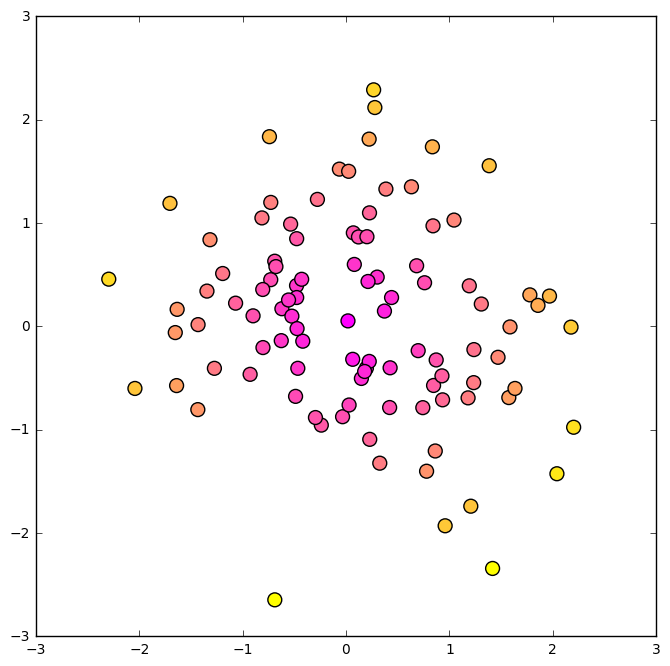

In [3]:
data_x = np.random.normal(size=(100, 2))
data_y = (data_x[:, 0] ** 2 + data_x[:, 1] ** 2) ** 0.5
plt.figure(figsize=(8, 8))
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring')

In [4]:
from sklearn.tree import DecisionTreeRegressor

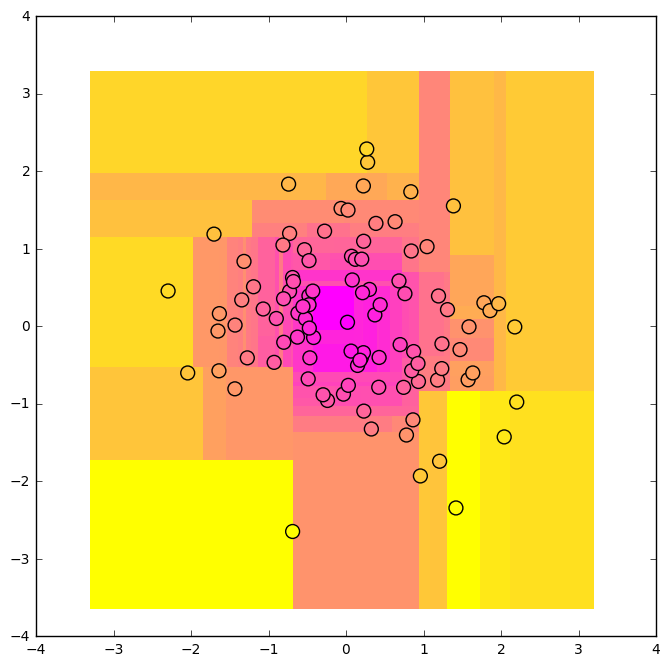

In [5]:
clf = DecisionTreeRegressor()
clf.fit(data_x, data_y)

xx, yy = get_grid(data_x)

predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring')

Посмотрим как будут выглядеть разделяющая поверхность в зависимости от 
- минимального количества объектов в листе
- максимальной глубины дерева

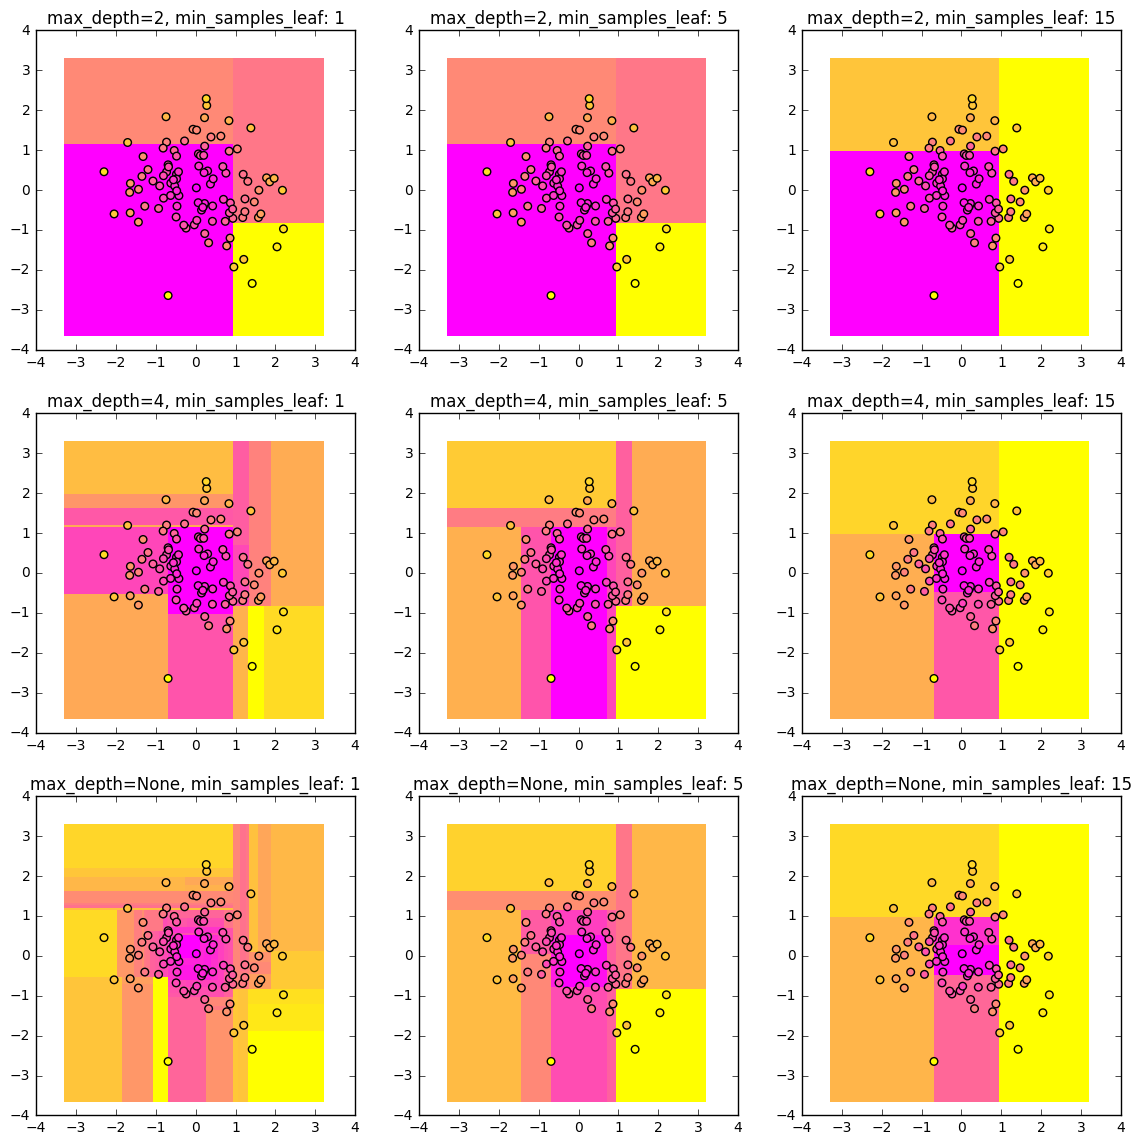

In [6]:
plt.figure(figsize=(14, 14))
for i, max_depth in enumerate([2, 4, None]):
    for j, min_samples_leaf in enumerate([1, 5, 15]):
        clf = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf.fit(data_x, data_y)
        xx, yy = get_grid(data_x)
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
        plt.subplot2grid((3, 3), (i, j))
        plt.pcolormesh(xx, yy, predicted, cmap='spring')
        plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='spring')
        plt.title('max_depth=' + str(max_depth) + ', min_samples_leaf: ' + str(min_samples_leaf))

- Увеличение максимальной глубины и/или уменьшение минимального количества объектов выборки в листе приводит к увеличению качества на обучающей выборке и переобучению.

## Неустойчивость решающих деревьев

Решающие деревья — это алгоритмы, неустойчивые к изменениям обучающей выборки, т.е. при малейших её изменениях итоговый классификатор может радикально измениться.
Посмотрим, как будет меняться структура дерева при обучении на разных 90%-х подвыборках.


/Users/yashakb/env-yashakb/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


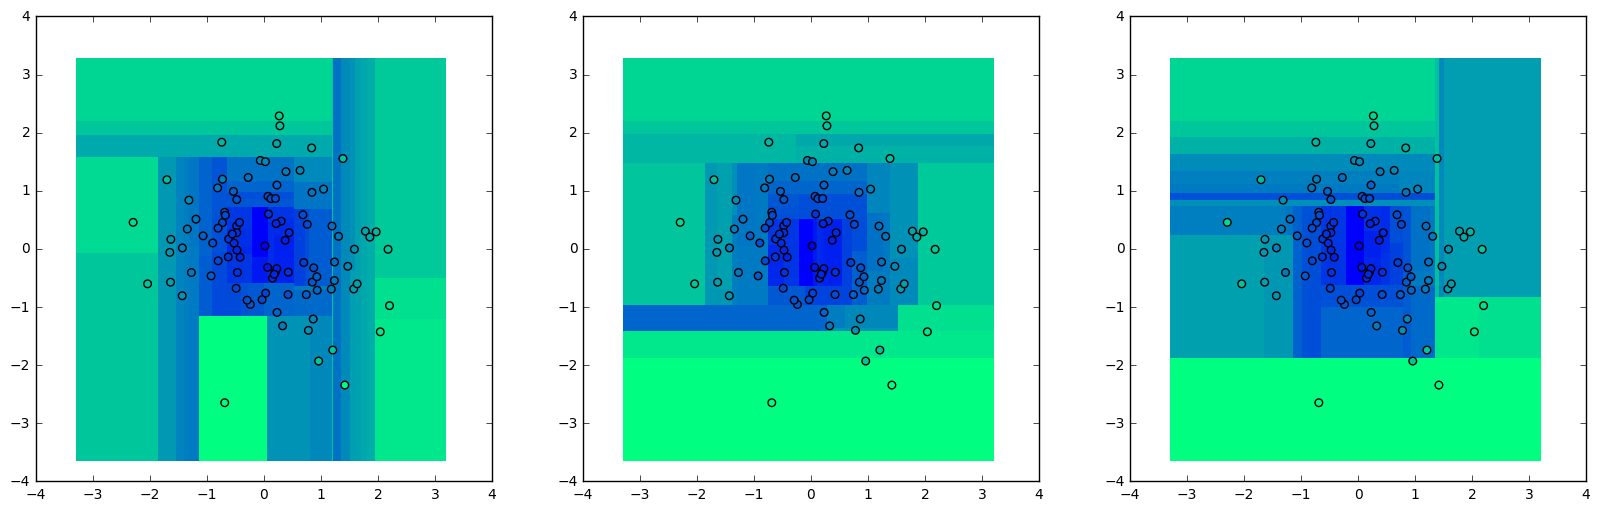

In [7]:
plt.figure(figsize=(20, 6))
for i in range(3):
    clf = DecisionTreeRegressor(random_state=42)

    indecies = np.random.randint(data_x.shape[0], size=(data_x.shape[0] * 0.9))
    clf.fit(data_x[indecies], data_y[indecies])
    xx, yy = get_grid(data_x)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot2grid((1, 3), (0, i))
    plt.pcolormesh(xx, yy, predicted, cmap='winter')
    plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='winter')

## Подбор параметров

Посмотрим на качество дерева в зависимости от параметров на одном из стандартных наборов данных - Бостонском датасете.

In [8]:
from sklearn.datasets import load_boston

In [9]:
data = load_boston()
print data.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [10]:
X_full = data.data
y_full = data.target

In [11]:
X_full.shape

(506, 13)

In [12]:
y_full[:10]

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,  18.9])

In [13]:
from sklearn.cross_validation import train_test_split
X, X_test, y, y_test = train_test_split(X_full, y_full, test_size=100, 
                                        random_state=241)

In [14]:
from sklearn.cross_validation import KFold, cross_val_score
cv = KFold(X.shape[0], shuffle=True, random_state=241)

In [16]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(random_state=241)
print -cross_val_score(regr, X, y, cv=cv, 
                       scoring='mean_squared_error').mean()

24.4502234931


In [17]:
regr.fit(X, y)
regr.tree_

In [18]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(random_state=241)
print cross_val_score(regr, X, y, cv=cv, 
                       scoring='r2').mean()

0.705238866424


In [19]:
from sklearn.grid_search import GridSearchCV
gs = GridSearchCV(DecisionTreeRegressor(random_state=241),
                  param_grid={'max_features': [None, 'log2', 'sqrt'], 
                              'max_depth': [2, 4, 6, 8, 10, 20, 50]},
                  cv=cv,
                  scoring='r2')
gs.fit(X, y)
gs.grid_scores_

[mean: 0.60310, std: 0.07101, params: {'max_features': None, 'max_depth': 2},
 mean: 0.42140, std: 0.06060, params: {'max_features': 'log2', 'max_depth': 2},
 mean: 0.42140, std: 0.06060, params: {'max_features': 'sqrt', 'max_depth': 2},
 mean: 0.73879, std: 0.11251, params: {'max_features': None, 'max_depth': 4},
 mean: 0.38099, std: 0.12633, params: {'max_features': 'log2', 'max_depth': 4},
 mean: 0.38099, std: 0.12633, params: {'max_features': 'sqrt', 'max_depth': 4},
 mean: 0.76242, std: 0.03348, params: {'max_features': None, 'max_depth': 6},
 mean: 0.51970, std: 0.05065, params: {'max_features': 'log2', 'max_depth': 6},
 mean: 0.51970, std: 0.05065, params: {'max_features': 'sqrt', 'max_depth': 6},
 mean: 0.73660, std: 0.00573, params: {'max_features': None, 'max_depth': 8},
 mean: 0.59787, std: 0.05413, params: {'max_features': 'log2', 'max_depth': 8},
 mean: 0.59787, std: 0.05413, params: {'max_features': 'sqrt', 'max_depth': 8},
 mean: 0.72800, std: 0.00374, params: {'max_feat

In [20]:
from sklearn.grid_search import GridSearchCV
gs = GridSearchCV(DecisionTreeRegressor(random_state=241),
                  param_grid={'max_features': [None, 'log2', 'sqrt'],
                              'max_depth': [2, 4, 6, 8, 10, 20, 50], 
                              'min_samples_leaf': range(1, 20)},
                  cv=cv,
                  scoring='r2')
gs.fit(X, y)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=406, n_folds=3, shuffle=True, random_state=241),
       error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=241,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [None, 'log2', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, 20, 50], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [21]:
gs.best_score_

0.775856892150106

In [22]:
for z in gs.grid_scores_:
    if z.mean_validation_score == gs.best_score_:
        print z

mean: 0.77586, std: 0.03204, params: {'max_features': None, 'max_depth': 6, 'min_samples_leaf': 2}


## Решающие леса

Чтобы уменьшить влияние рассмотренных недостатков решающих деревьев, используют **случайные леса (random forest)**. Одно дерево может ошибаться, поэтому давайте построим много деревьев и "усредним" их ответы.

Если строить все эти леса по одной и той же обучающей выборке, они будут одинаковые, поэтому для каждого решающего дерева, которое мы строим:
* вместо исходной обучающей выборки $X^l$ используется бутстрап (т.е. выборка $l$ объектов **с возвращениями**);
* в каждой внутренней вершине выбор условия осуществляется не среди всех признаков, а среди $q$ случайно выбранных.

Такая рандомизация обеспечит нам различность деревьев. После того, как таким образом были получены алгоритмы $b_1(x), ... b_N(x)$ можно построить итоговый алгоритм как:
* **выбор большинства** в случае классификации: $a(x) = \arg \max_{y in \mathbb{Y}} \sum_{n=1}^N [b_n(x) = y]$
* **среднее** в случае регрессии: $a(x) = \frac{1}{N} \sum_{n = 1}^N b_n(x)$

Посмотрим, какое качество можно получить при использовании различных способов усреднения деревьев.

In [23]:
regr = DecisionTreeRegressor()
print cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean()

0.705602091005


In [24]:
regr = DecisionTreeRegressor()
print cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean()

0.727720843257


In [26]:
from sklearn.ensemble import BaggingRegressor

In [27]:
regr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=10,
                        bootstrap=False, random_state=241)
print cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean()

0.744495766448


In [35]:
regr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=10,
                        bootstrap=False, random_state=241,
                        max_samples=0.707)
print cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean()

0.835364857972


In [29]:
regr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100,
                        bootstrap=False, random_state=241,
                        max_samples=0.5)
print cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean()

0.83885573889


In [31]:
regr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=1000,
                        bootstrap=False, random_state=241,
                        max_samples=0.5)
print cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean()

0.839208296696


In [32]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=10)
print cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean()

0.831968576342


In [36]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=100)
print cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean()

0.847266009473


In [37]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=300)
print cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean()

0.848919088623


In [38]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=500)
print cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean()

0.84927323603


In [39]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=1000)
print cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean()

0.849551357468


### Probability calibration

Калибровка вероятностей - приведение ответов алгоритма к значениям, близким к вероятностям объектов принадлежать конкретному классу.

Зачем это нужно? 
- Вероятности гораздо проще интерпретировать
- Вероятности могут дать дополнительную информацию о результатах работы алгоритма

Для каких алгоритмов стоит калибровать вероятности?
- SVM Classifier?
- Logistic Regression?
- Random Forest?

### Методы калибровки

Для чего нужна калибровка? Допустим, у нас есть алгоритм, который решает задачу классификации. При этом он выдает предсказания не в виде меток классов, а в виде значений в промежутке $[0,1]$. При этом чем больше значение предсказания на данном объекте, тем больше шансов, что он принадлежит первому классу. Мы хотим из этих предсказаний получить настоящие оценки вероятностей.

Идея калибровки заключаются в следующем: на отложенной выборке настроим **монотонную** регрессию по предсказаниям классфикатора на метки классов. Соответствующая построенная модель, применённая к предсказаниям алгоритма, и будет откалиброванными предсказаниями алгоритма.

Регрессия называется монотонной, если $x_i < x_j \rightarrow f(x_i) < f(x_j)$

Предлагаятся два варианта калибровки(два способа построения регрессии):
- isotonic
Непараметрический метод, который настраивает кусочно-постоянную неубывающую функцию (калибрует хорошо, но имеет тенденцию к переобучению при маленькой калибрационной выборке)
- sigmoid
 $$P(y=1|x)=(1+\exp(Af(x)+B))^{-1}$$
 где коэффициенты A и B настраиваются.


In [40]:
from sklearn.calibration import CalibratedClassifierCV

In [41]:
r = np.random.randn(30000,2)
r1 = np.random.randn(30000,2) + np.array([5,5])
r2 = np.random.randn(30000,2) + np.array([-5,-5])

In [42]:
r0 = np.vstack((r, r1, r2))
y0 = np.concatenate((np.zeros(30000), (np.random.uniform(0,1, size =30000) > 0.5).astype(int),
                    np.ones(30000)))

In [43]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/Users/yashakb/env-yashakb/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


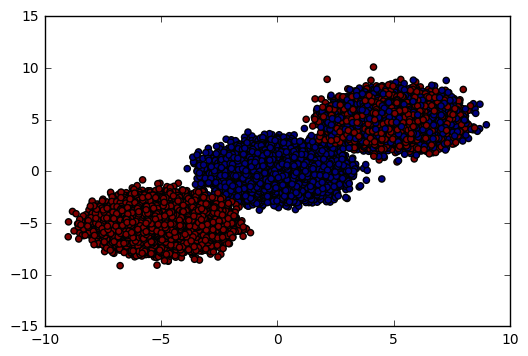

In [44]:
plt.scatter(r0[:,0], r0[:,1], c = y0)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
Xtr, Xt, ytr, yt = train_test_split(r0, y0, train_size = 10000)
rf = RandomForestClassifier(n_estimators=100).fit(Xtr, ytr)


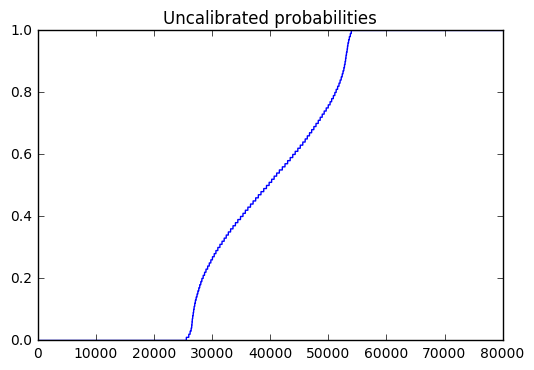

In [46]:

plt.plot(np.sort(rf.predict_proba(Xt)[:,1]))
plt.title('Uncalibrated probabilities')

In [47]:
crf = CalibratedClassifierCV(RandomForestClassifier(n_estimators=100), method='isotonic')
crf = crf.fit(Xtr,ytr)

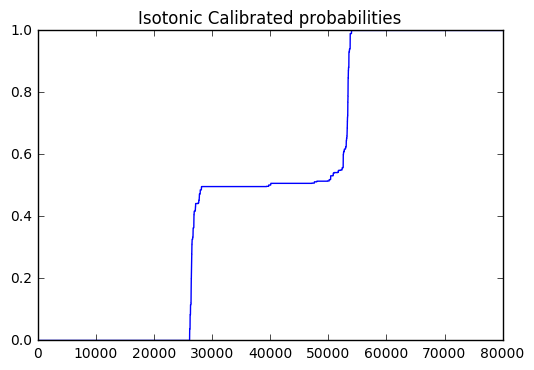

In [48]:
plt.title('Isotonic Calibrated probabilities')
plt.plot(np.sort(crf.predict_proba(Xt)[:,1]))

[Занятные картинки](http://scikit-learn.org/stable/modules/calibration.html)

### Вопросы:
- Работает ли эта калибровка?
- Изменяется ли AUC_ROC после калибровки?